<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"First carry out Exercise 2.8 of the textbook with their ZIP-code data and then replicate the process the best you manage to some data from you own problem that was established in the first homework."

In [77]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

## **Regresión líneal**
(usado para resolver el problema de ZIP-code [2,3] del libro [liga](https://link.springer.com/book/10.1007/978-0-387-84858-7))


Iniciamos cargando los datos de entrenamiento de los códigos postales 2 y 3 en los arreglos $X$ y $Y$:

In [78]:
df1 = pd.read_csv('zip_train.csv', header=None)
n = [2,3]
df1 = df1.loc[ df1.iloc[:,0].isin(n)]
df2 = df1.iloc[:,0]
df1 = df1.drop([0],axis=1)
X  = df1.to_numpy() ## Características
Y  = df2.to_numpy() ## Etiquetas

Ahora, cargamos los datos de prueba en los arreglos $Xt$ y $Yt$:

In [79]:
df1 = pd.read_csv('zip_test.csv', header=None)
df1 = df1.loc[ df1.iloc[:,0].isin(n)]
df2 = df1.iloc[:,0]
df1 = df1.drop([0],axis=1)
Xt  = df1.to_numpy()
Yt  = df2.to_numpy()

A continuación, obtenemos un modelo de predicción de los datos de entrenamiento usando regresión lineal. Posteriomente, calculamos los errores entre la predicción $y\_pred$ y los datos de entrenamiento "Y". Los errores de la predicción con datos de entrenamiento son representados por un histograma.

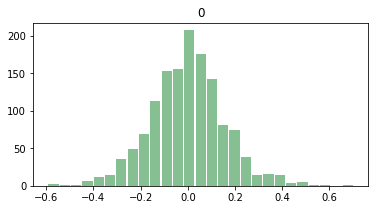

In [80]:
model = LinearRegression().fit(X, Y) #https://realpython.com/linear-regression-in-python/
y_pred = model.predict(X)
error = Y - y_pred
dfx = pd.DataFrame(error,Y)
plt = dfx.hist(column=0, bins=27, grid=False, figsize=(6,3), color='#86bf91', zorder=2, rwidth=0.9)
err_regress = mean_absolute_error(Y,y_pred)

Ahora, utilizamos el modelo obtenido con los datos de entrenamiento para predecir los datos de prueba. Además,  calculamos los errores entre la predicción $y\_pred2$ y los datos de prueba $Yt$. Los errores de la predicción con datos de prueba son representados por un histograma.

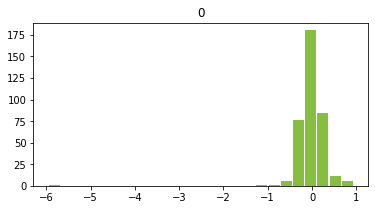

In [81]:
y_pred2 = model.predict(Xt)
error2 = Yt - y_pred2
df = pd.DataFrame(error2,Yt)
df.to_csv('sample.csv')
plt = df.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#86bf40', zorder=2, rwidth=0.9)
err_regress_t = mean_absolute_error(y_pred2,Yt)

Por último calculamos el **error absoluto medio (MAE)** de los datos de entrenamiento así como de los datos de prueba.

In [82]:
print("MAE del modelo de regresión con datos de entrenamiento:", err_regress)
print("MAE del modelo de regresión con datos de prueba:", err_regress_t) 

MAE del modelo de regresión con datos de entrenamiento: 0.12054534466534834
MAE del modelo de regresión con datos de prueba: 0.1911427954737535


#**k-nearest neighbors**
(usado para resolver el problema de ZIP-code [2,3] del libro [liga](https://link.springer.com/book/10.1007/978-0-387-84858-7))

Usaremos los arreglos $mae\_knn$ y $mae\_knn\_y$ para guardar los resultados del error de predicción de cada modelo de K-NN con parámetro $k$.

In [83]:
k_list    = [1, 3, 5, 7, 15] ## Lista de parámetros k
mae_knn   = []  ## Guarda valores de error de diferentes k en datos de entrenamiento
mae_knn_t = []  ## Guarda valores de error de diferentes k en datos de prueba

Para cada $k$ se obtiene un modelo K-NN con los que se calculan el **error absoluto medio (MAE)** para los datos de entrenamiento $X$ como de prueba $Xt$.

In [ ]:
for k in k_list:
    #https://realpython.com/knn-python/#:~:text=The%20kNN%20algorithm%20is%20a,in%20Python%3A%20A%20Practical%20Guide.
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, Y)
    y_pred   = model.predict(X) 
    y_predt   = model.predict(Xt)
    mae_knn.append(mean_absolute_error(Y,y_pred))
    mae_knn_t.append(mean_absolute_error(Yt,y_predt))
    error = Y - y_pred  
    df = pd.DataFrame(error,Y)
    plt = df.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#86bf91', zorder=2, rwidth=0.9)
    errort = Yt - y_predt
    dft = pd.DataFrame(errort,Yt)
    plt2 = dft.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#86bf40', zorder=2, rwidth=0.9)

Por último imprimimos el **error absoluto medio (MAE)** de los datos de entrenamiento así como de los datos de prueba del modelo K-NN.

In [100]:
print("MAE del modelo de KNN con datos de entrenamiento:", mae_knn)
print("MAE del modelo de KNN con datos de prueba:", mae_knn_t) 

MAE del modelo de KNN con datos de entrenamiento: [0.0, 0.007199424046076315, 0.010079193664506842, 0.013370358942713153, 0.023710103191744672, 0.0, 0.007199424046076315, 0.010079193664506842, 0.013370358942713153, 0.023710103191744672, 0.0, 0.007199424046076315, 0.010079193664506842, 0.013370358942713153, 0.023710103191744672, 0.0, 0.007199424046076315, 0.010079193664506842, 0.013370358942713153, 0.023710103191744672, 0.0, 0.007199424046076315, 0.010079193664506842, 0.013370358942713153, 0.023710103191744672, 0.0, 0.0, 0.0, 0.0, 0.007199424046076315, 0.010079193664506842, 0.013370358942713153, 0.023710103191744672]
MAE del modelo de KNN con datos de prueba: [0.024725274725274724, 0.03021978021978022, 0.03296703296703297, 0.03767660910518054, 0.04761904761904762, 0.024725274725274724, 0.03021978021978022, 0.03296703296703297, 0.03767660910518054, 0.04761904761904762, 0.024725274725274724, 0.03021978021978022, 0.03296703296703297, 0.03767660910518054, 0.04761904761904762, 0.024725274725